# Linear Regression
### Parameters:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

### Prediction: *level*
## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "abomination-vaults-bestiary.db",
    "age-of-ashes-bestiary.db",
    "agents-of-edgewatch-bestiary.db",
    "april-fools-bestiary.db",
    "blog-bestiary.db",
    "blood-lords-bestiary.db",
    "book-of-the-dead-bestiary.db",
    "crown-of-the-kobold-king-bestiary.db",
    "extinction-curse-bestiary.db",
    "fall-of-plaguestone.db",
    "fists-of-the-ruby-phoenix-bestiary.db",
    "gatewalkers-bestiary.db",
    "impossible-lands-bestiary.db",
    "kingmaker-bestiary.db",
    "malevolence-bestiary.db",
    "menace-under-otari-bestiary.db",
    "monsters-of-myth-bestiary.db",
    "mwangi-expanse-bestiary.db",
    "night-of-the-gray-death-bestiary.db",
    "npc-gallery.db",
    "one-shot-bestiary.db",
    "outlaws-of-alkenstar-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
    "pathfinder-bestiary.db",
    "pathfinder-dark-archive.db",
    "pfs-introductions-bestiary.db",
    "pfs-season-1-bestiary.db",
    "pfs-season-2-bestiary.db",
    "pfs-season-3-bestiary.db",
    "pfs-season-4-bestiary.db",
    "quest-for-the-frozen-flame-bestiary.db",
    "shadows-at-sundown-bestiary.db",
    "strength-of-thousands-bestiary.db",
    "the-slithering-bestiary.db",
    "travel-guide-bestiary.db",
    "troubles-in-otari-bestiary.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.head()

,book,will,wis,cha,level,hp,focus,dex,ac,int,fortitude,perception,con,reflex,str
0,Pathfinder #165: Eyes of Empty Death,20.0,3.0,0.0,9,155,1,3.0,28.0,0.0,15.0,18.0,0.0,18.0,6.0
1,Pathfinder Abomination Vaults Hardcover Compil...,19.0,3.0,0.0,10,175,0,3.0,30.0,0.0,22.0,19.0,6.0,17.0,7.0
2,Pathfinder #164: Hands of the Devil,9.0,3.0,1.0,2,38,0,3.0,17.0,-2.0,7.0,7.0,1.0,11.0,4.0
3,Pathfinder #164: Hands of the Devil,15.0,3.0,1.0,8,140,0,4.0,27.0,0.0,17.0,16.0,3.0,16.0,3.0
4,Pathfinder #165: Eyes of Empty Death,18.0,4.0,2.0,9,90,0,6.0,31.0,2.0,14.0,20.0,0.0,21.0,-5.0


## Preprocessing and train test split

In [3]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[features] = pd.DataFrame(scaler.fit_transform(df[features]), index=df.index)
min_max_df["book"] = df["book"]
min_max_df["level"] = df["level"]

In [4]:
min_max_df.head()

,cha,con,dex,int,str,wis,ac,hp,perception,fortitude,reflex,will,focus,book,level
0,0.294118,0.142857,0.470588,0.333333,0.647059,0.470588,0.509434,0.257095,0.156522,0.319149,0.431818,0.416667,0.333333,Pathfinder #165: Eyes of Empty Death,9
1,0.294118,0.571429,0.470588,0.333333,0.705882,0.470588,0.547170,0.290484,0.165217,0.468085,0.409091,0.395833,0.000000,Pathfinder Abomination Vaults Hardcover Compil...,10
2,0.352941,0.214286,0.470588,0.200000,0.529412,0.470588,0.301887,0.061770,0.060870,0.148936,0.272727,0.187500,0.000000,Pathfinder #164: Hands of the Devil,2
3,0.352941,0.357143,0.529412,0.333333,0.470588,0.470588,0.490566,0.232053,0.139130,0.361702,0.386364,0.312500,0.000000,Pathfinder #164: Hands of the Devil,8
4,0.411765,0.142857,0.647059,0.466667,0.000000,0.529412,0.566038,0.148581,0.173913,0.297872,0.500000,0.375000,0.000000,Pathfinder #165: Eyes of Empty Death,9


### Chronological split

In [5]:
from training.splitting_dataset import split_dataframe

os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(min_max_df, test_size=0.31)
os.chdir("../notebooks/models/linear_regression")

In [6]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

In [7]:
y_train = y_train.astype("int64")
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1626 entries, 2574 to 1449
Series name: level
Non-Null Count  Dtype
--------------  -----
1626 non-null   int64
dtypes: int64(1)
memory usage: 25.4 KB


### Random split

In [8]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(min_max_df, chronological_split=False, test_size=0.25)

In [9]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## Linear Regression
### With chronological split

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict = model.predict(X_test)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2 = r2_score(y_train, y_pred_train)
print(f"R2 score:{r2:.2f}")

R2 score:0.99


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.61
RMSE test: 0.74
MAE test: 0.48


In [12]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "expanded", rmse, mae]

###### MAE by level

In [13]:
from training.results import plot_mae_by_level

0       9
1       2
2       8
3       9
4       6
       ..
2059    2
2060    3
2061    4
2062    2
2063    2
Name: level, Length: 2064, dtype: int64 [8.90734012 2.1342627  7.91039495 ... 4.30587875 2.85111185 2.38708497]
21 25.955740200604698
    level       mae
0    -1.0  1.065984
1     0.0  0.711343
2     1.0  0.402502
3     2.0  0.306555
4     3.0  0.388943
5     4.0  0.413814
6     5.0  0.375474
7     6.0  0.419536
8     7.0  0.524946
9     8.0  0.379579
10    9.0  0.323979
11   10.0  0.420294
12   11.0  0.523733
13   12.0  0.391045
14   13.0  0.543186
15   14.0  0.423713
16   15.0  0.553470
17   16.0  0.483763
18   17.0  0.452857
19   18.0  0.630272
20   19.0  0.643900
21   20.0  0.743721
22   21.0  1.372309


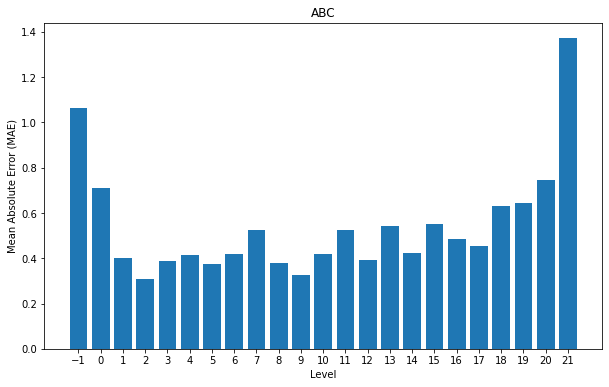

In [14]:
from matplotlib import pyplot as plt

title = "ABC"

y_test = y_test.reset_index(drop=True)
level_max = y_test.max()

print(y_test, y_pred_test)
print(y_test.max(), y_pred_test.max())

mae_by_level = pd.DataFrame(columns=["level", "mae"])
for lvl in range(-1, level_max + 1):
    y_test_curr = y_test[y_test == lvl]
    y_pred_test_curr = pd.DataFrame(y_pred_test)[y_test == lvl]

    mae = mean_absolute_error(y_test_curr, y_pred_test_curr)
    mae_by_level.loc[lvl + 1] = [lvl, mae]

print(mae_by_level)
plt.figure(figsize=(10, 6))
plt.bar(mae_by_level["level"], mae_by_level["mae"])
plt.xlabel("Level")
plt.ylabel("Mean Absolute Error (MAE)")

if title is None:
    plt.title("MAE by level")
else:
    plt.title(title)

plt.xticks(mae_by_level["level"])
plt.show()

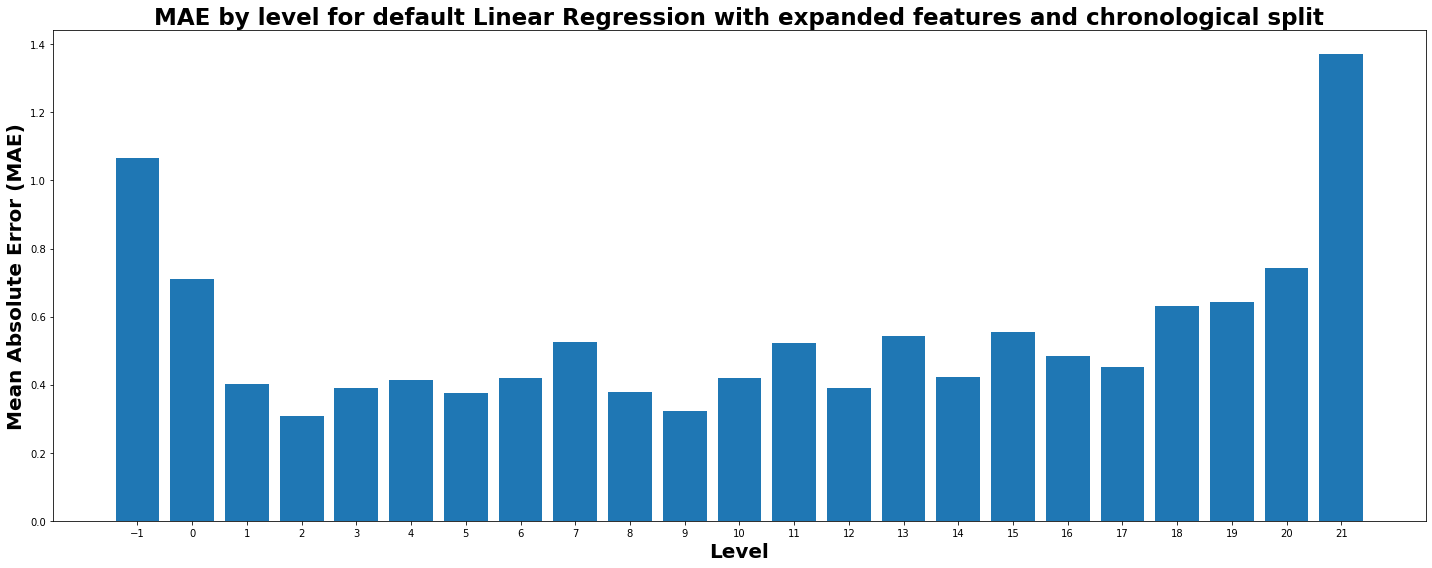

In [15]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default Linear Regression with expanded features and chronological split",
)

In [16]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.74

Round type: 0.5
RMSE: 0.75

Round type: 0.33
RMSE: 0.74

Round type: 0.45
RMSE: 0.75



In [17]:
predict[predict < -1] = -1
predict[predict > 21] = 21

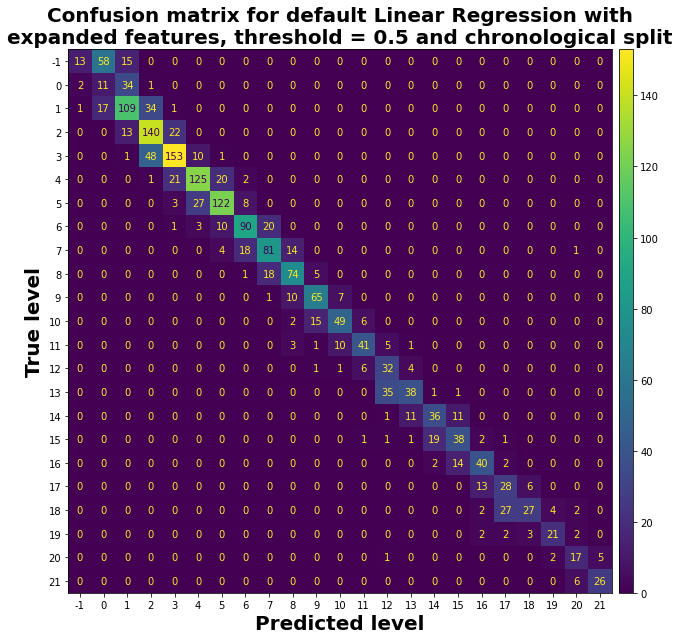

In [18]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for default Linear Regression with\nexpanded features, threshold = 0.5 and chronological split",
)

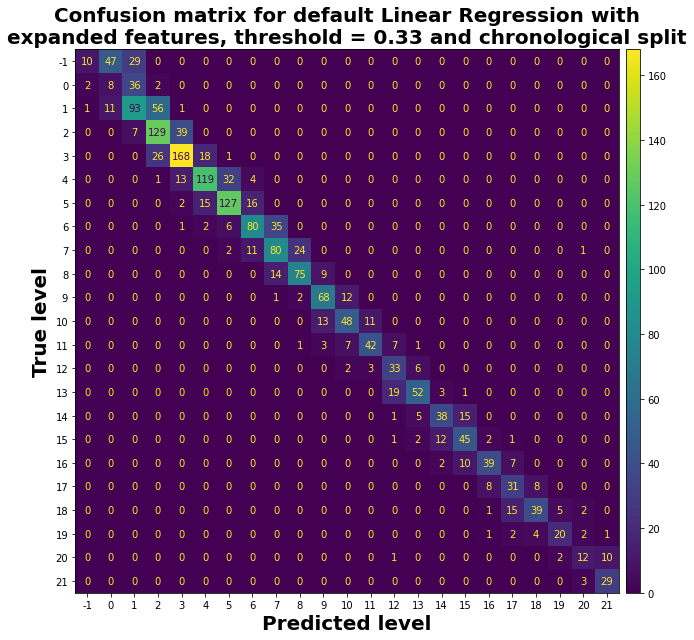

In [19]:
plot_confusion_matrix(
    predict,
    y_test,
    0.33,
    title="Confusion matrix for default Linear Regression with\nexpanded features, threshold = 0.33 and chronological split",
)

### With random split

In [20]:
model = LinearRegression()
model.fit(X_train_random_split, y_train_random_split)

y_pred_train_random_split = model.predict(X_train_random_split)
y_pred_test_random_split = model.predict(X_test_random_split)

r2 = r2_score(y_train_random_split, y_pred_train_random_split)
print(f"R2 score:{r2:.2f}")

R2 score:0.99


In [21]:
rmse_train = mean_squared_error(
    y_train_random_split, y_pred_train_random_split, squared=False
)
rmse = mean_squared_error(y_test_random_split, y_pred_test_random_split, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test_random_split)

print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")

RMSE train: 0.66
RMSE test: 0.63
MAE test: 0.42


In [22]:
results.loc[1] = ["random", "default", "expanded", rmse, mae]

###### MAE by level

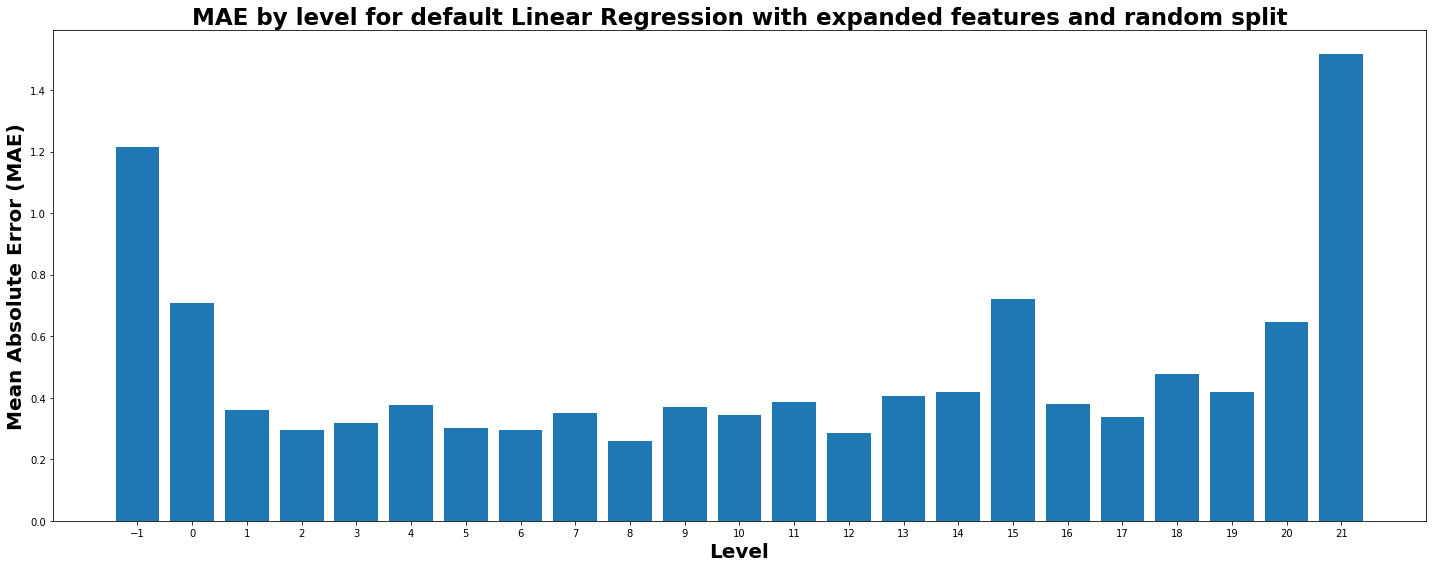

In [23]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for default Linear Regression with expanded features and random split",
)

In [24]:
evaluate_round_predictions(
    [0.5, 0.33, 0.45], y_test_random_split, y_pred_test_random_split
)

Default:
RMSE: 0.63

Round type: 0.5
RMSE: 0.61

Round type: 0.33
RMSE: 0.65

Round type: 0.45
RMSE: 0.61



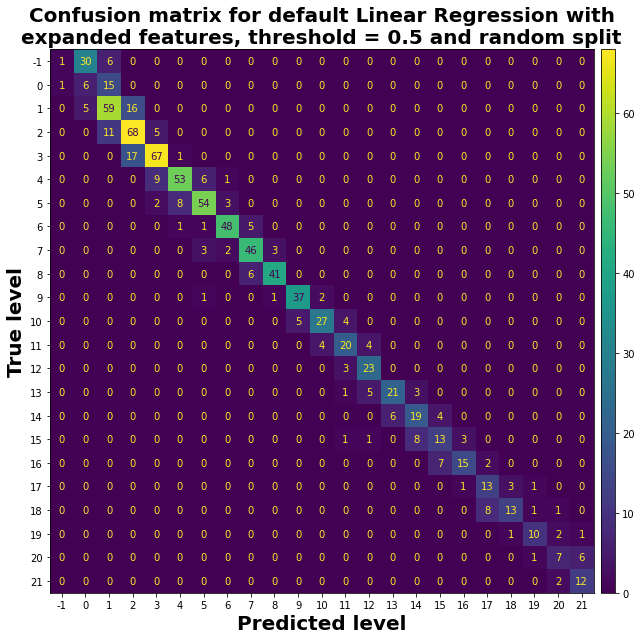

In [25]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    title="Confusion matrix for default Linear Regression with\nexpanded features, threshold = 0.5 and random split",
)

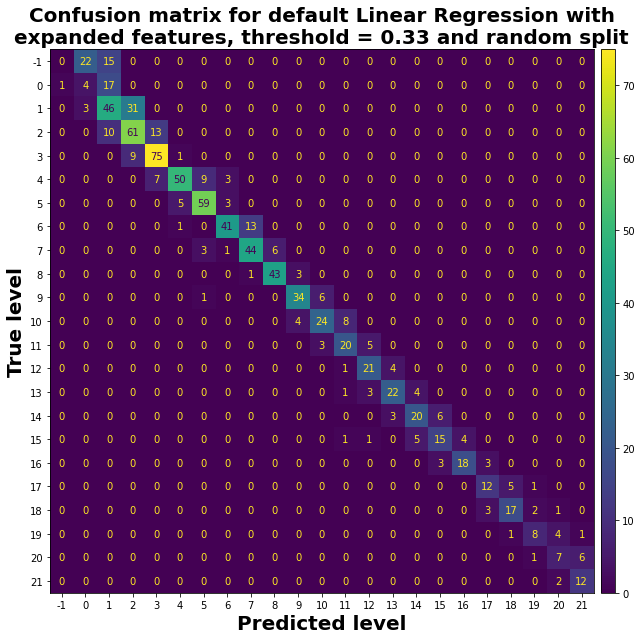

In [26]:
plot_confusion_matrix(
    y_pred_test_random_split,
    y_test_random_split,
    0.33,
    title="Confusion matrix for default Linear Regression with\nexpanded features, threshold = 0.33 and random split",
)

## Tuning (ridge, LASSO)

### With chronological split

In [27]:
from sklearn.linear_model import RidgeCV, LassoCV
from training.results import assess_regression_model


reg_ridge_cv = RidgeCV(alphas=np.linspace(0.1, 100, 1000))
reg_lasso_cv = LassoCV(n_alphas=1000, random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train, y_train)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train,
    np.array(y_train).reshape(
        y_train.size,
    ),
)

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

print(f"Ridge CV alpha: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()

print("Linear Regression")
assess_regression_model(reg_linear, X_train, X_test, y_train, y_test, r2=True)

print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[2] = ["chronological", "Ridge", "expanded", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv, X_train, X_test, y_train, y_test, r2=True
)
results.loc[3] = ["chronological", "Lasso", "expanded", rmse, mae]

Ridge CV alpha: 0.1000
Lasso CV alpha: 0.0010

Linear Regression
R2: 0.99
RMSE train: 0.61
RMSE test: 0.74
MAE test: 0.48

Ridge:
R2: 0.99
RMSE train: 0.61
RMSE test: 0.72
MAE test: 0.47

Lasso:
R2: 0.99
RMSE train: 0.61
RMSE test: 0.71
MAE test: 0.47



###### MAE by level Ridge

In [28]:
y_pred_test = reg_ridge_cv.predict(X_test)

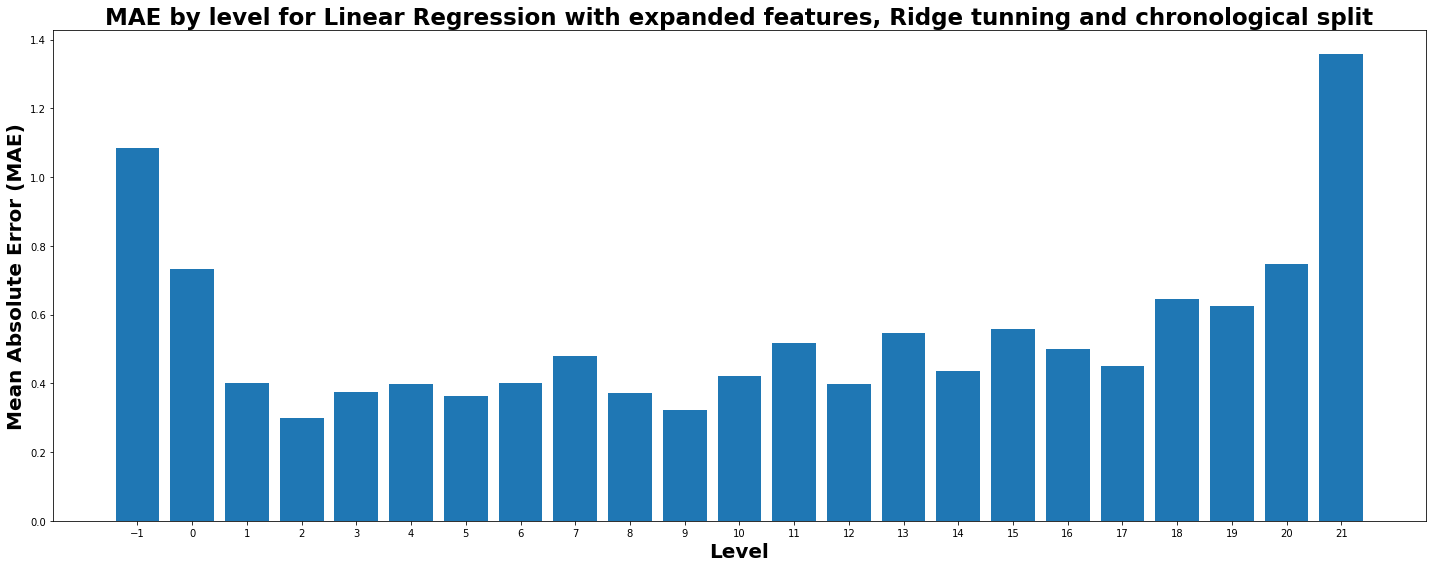

In [29]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with expanded features, Ridge tunning and chronological split",
)

###### MAE by level LASSO

In [30]:
y_pred_test = reg_lasso_cv.predict(X_test)

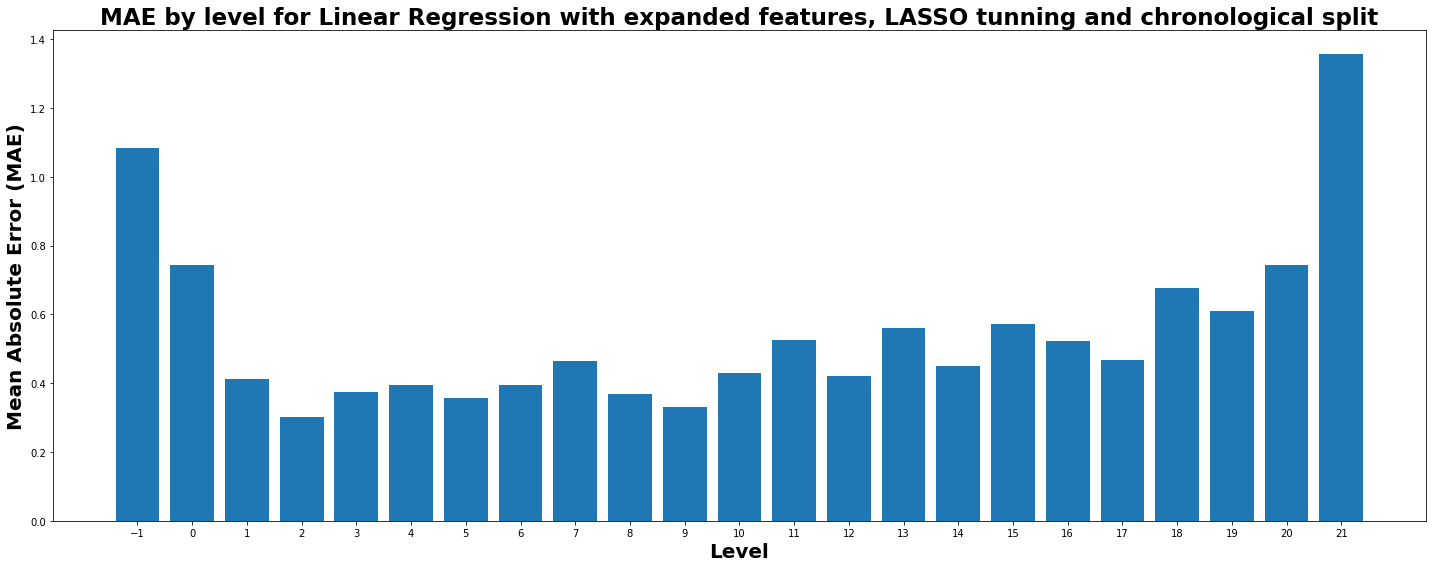

In [31]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for Linear Regression with expanded features, LASSO tunning and chronological split",
)

Index(['cha', 'con', 'dex', 'int', 'str', 'wis', 'ac', 'hp', 'perception',
       'fortitude', 'reflex', 'will', 'focus'],
      dtype='object')
[-0.2242373  -0.34055899 -0.92209243 -0.16194242 -0.63347833 -1.73265634
  7.43483356  3.51760493  9.98994401  7.64585576  4.48552073  6.90555178
 -0.17865801]


<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

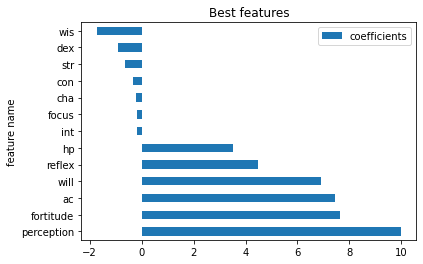

In [32]:
feature_names = X_train.columns
print(feature_names)
print(reg_ridge_cv.coef_)

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": features,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(x="feature name", y="coefficients", title="Best features")

In [33]:
sorted(feature_names[reg_lasso_cv.coef_ == 0])

[]

### With random split

In [34]:
from sklearn.linear_model import RidgeCV, LassoCV

reg_ridge_cv = RidgeCV(alphas=np.linspace(1e-3, 1, 10000))
reg_lasso_cv = LassoCV(alphas=np.linspace(1e-4, 1e-1, 1000), random_state=0)

reg_ridge_cv = reg_ridge_cv.fit(X_train_random_split, y_train_random_split)
reg_lasso_cv = reg_lasso_cv.fit(
    X_train_random_split,
    np.array(y_train_random_split).reshape(
        y_train_random_split.size,
    ),
)

print(f"Ridge CV alphas: {reg_ridge_cv.alpha_:.4f}")
print(f"Lasso CV alpha: {reg_lasso_cv.alpha_:.4f}")
print()
print("Ridge:")
rmse, mae = assess_regression_model(
    reg_ridge_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[4] = ["random", "Ridge", "expanded", rmse, mae]

print("Lasso:")
rmse, mae = assess_regression_model(
    reg_lasso_cv,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
    r2=True,
)
results.loc[5] = ["random", "Lasso", "expanded", rmse, mae]

Ridge CV alphas: 1.0000
Lasso CV alpha: 0.0026

Ridge:
R2: 0.99
RMSE train: 0.67
RMSE test: 0.63
MAE test: 0.42

Lasso:
R2: 0.99
RMSE train: 0.67
RMSE test: 0.64
MAE test: 0.42



###### MAE by level Ridge

In [35]:
y_pred_test_random_split = reg_ridge_cv.predict(X_test_random_split)

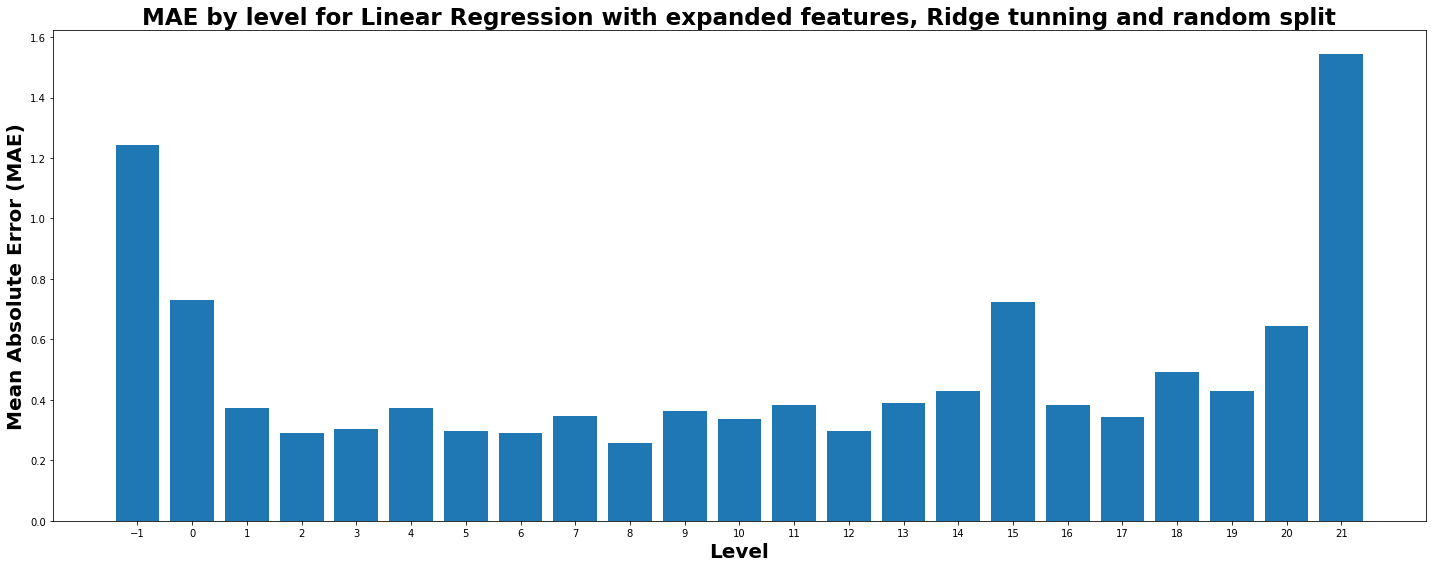

In [36]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with expanded features, Ridge tunning and random split",
)

###### MAE by level LASSO

In [37]:
y_pred_test_random_split = reg_lasso_cv.predict(X_test_random_split)

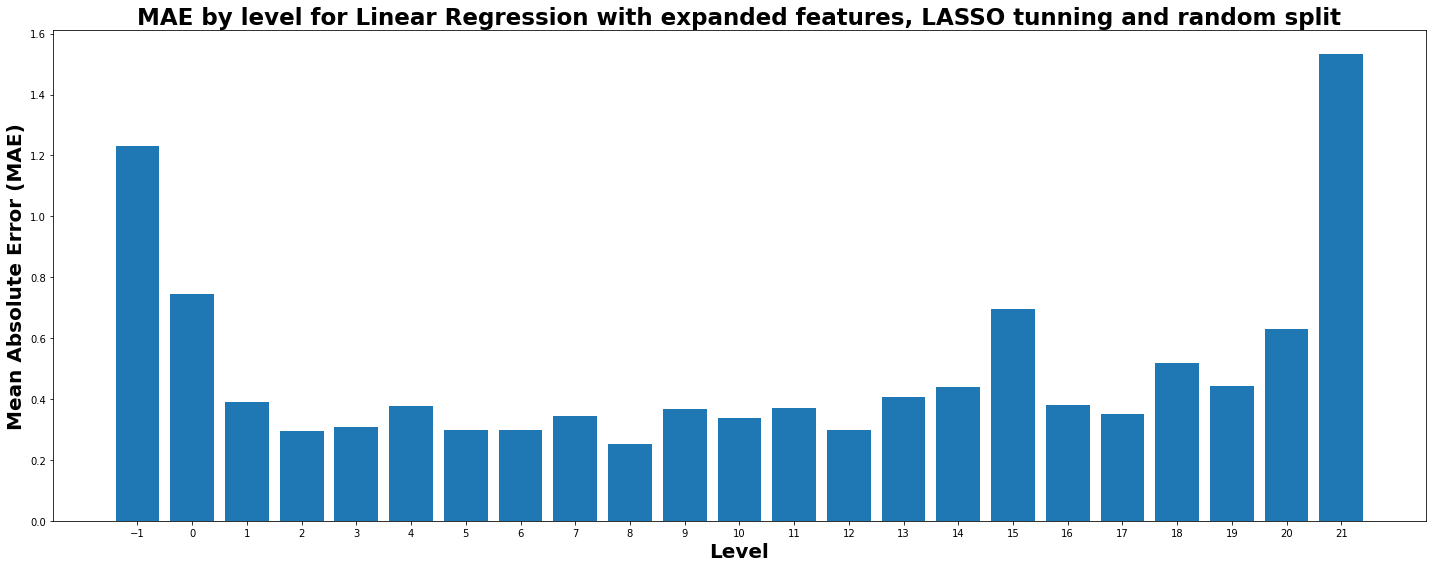

In [38]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test_random_split,
    title="MAE by level for Linear Regression with expanded features, LASSO tunning and random split",
)

Index(['cha', 'con', 'dex', 'int', 'str', 'wis', 'ac', 'hp', 'perception',
       'fortitude', 'reflex', 'will', 'focus'],
      dtype='object')
[-0.21323006 -0.23041155 -1.30040807  0.00856733 -0.65372329 -1.30488234
  6.6307784   4.45200271  3.96717115  7.74858808  6.35472421  7.10577199
  0.2317162 ]


<AxesSubplot:title={'center':'Best features'}, ylabel='feature name'>

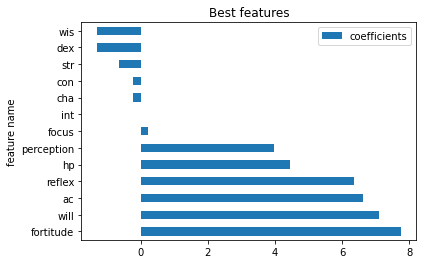

In [39]:
feature_names = X_train.columns
print(feature_names)
print(reg_ridge_cv.coef_)

ridgecv_coefficients = pd.DataFrame(
    {
        "feature name": features,
        "coefficients": reg_ridge_cv.coef_,
    }
)
best_features = ridgecv_coefficients.sort_values("coefficients", ascending=False)
best_features.plot.barh(x="feature name", y="coefficients", title="Best features")

In [40]:
eliminated_features = sorted(feature_names[reg_lasso_cv.coef_ == 0])
print(eliminated_features)

['int']


## Summary

In [41]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,expanded,0.741046,0.477639
1,random,default,expanded,0.629343,0.417888
2,chronological,Ridge,expanded,0.716936,0.471467
3,chronological,Lasso,expanded,0.713125,0.474571
4,random,Ridge,expanded,0.631491,0.418370
5,random,Lasso,expanded,0.636724,0.421761


In [42]:
from training.results import plot_summary

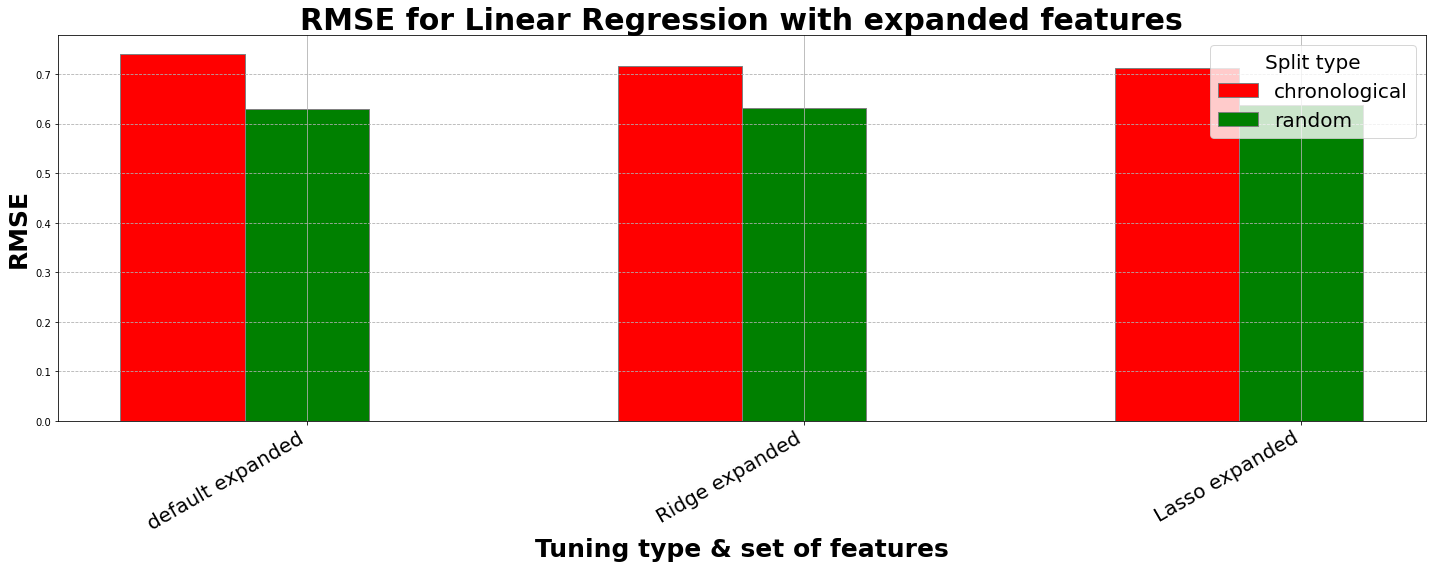

In [43]:
plot_summary(results, "RMSE", title="RMSE for Linear Regression with expanded features")

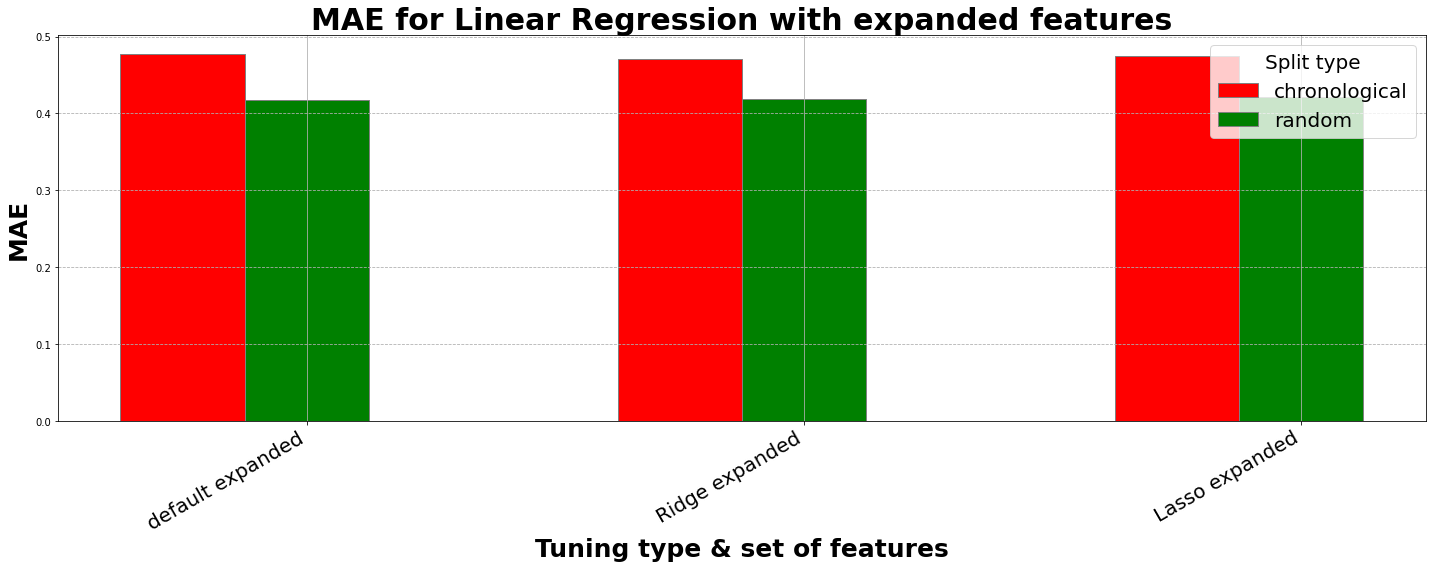

In [44]:
plot_summary(results, "MAE", title="MAE for Linear Regression with expanded features")

In [45]:
results.to_csv("./linear_regression_expanded_results.csv")